In [2]:
# %load ~/ipyhead
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Let's try using LM22 to deconvolve some mixtures that we can create.

Here is an example of how to call CIBERSORT: 
`java -Xmx3g -Xms3g -jar CIBERSORT.jar -M ExampleMixtures-GEPs.txt -B LM22.txt`

Just have to do this from R console first:
```
library(Rserve)
Rserve(args="--no-save")
```

# Mixtures that come with Cibersort


In [9]:
example_gt = pd.read_csv('~/CIBERSORT_package/ExampleMixtures-GroundTruth.txt', sep='\t', header=None)
example_gt.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.18,0.16,0.13,0.11,0.09,0.07,0.06,0.05,0.04,0.03,...,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
1,0.20,0.00,0.19,0.00,0.18,0.00,0.10,0.00,0.09,0.00,...,0.05,0.00,0.04,0.00,0.04,0.00,0.02,0.00,0.02,0.00
2,0.00,0.00,0.01,0.01,0.01,0.02,0.03,0.05,0.07,0.11,...,0.11,0.07,0.05,0.03,0.02,0.01,0.01,0.01,0.00,0.00
3,0.17,0.12,0.08,0.06,0.03,0.02,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.02,0.03,0.06,0.08,0.12,0.17
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.04,...,0.02,0.04,0.09,0.11,0.08,0.05,0.04,0.07,0.14,0.20


In [5]:
!java -Xmx3g -Xms3g -jar ~/CIBERSORT_package/CIBERSORT.jar -M ~/CIBERSORT_package/ExampleMixtures-GEPs.txt -B LM22.txt

>===================Settings====================
>Mixture file: /home/maxim/CIBERSORT_package/ExampleMixtures-GEPs.txt
>Signature matrix file: LM22.txt
>===============================================
>R version 3.2.2 (2015-08-14)
>==================CIBERSORT====================
Column	B cells naive	B cells memory	Plasma cells	T cells CD8	T cells CD4 naive	T cells CD4 memory resting	T cells CD4 memory activated	T cells follicular helper	T cells regulatory (Tregs)	T cells gamma delta	NK cells resting	NK cells activated	Monocytes	Macrophages M0	Macrophages M1	Macrophages M2	Dendritic cells resting	Dendritic cells activated	Mast cells resting	Mast cells activated	Eosinophils	Neutrophils	P-value	Pearson Correlation	RMSE	
0	0.18036348084728407	0.1597201742966229	0.1229443677357994	0.11118115089840458	0.08789475799695583	0.07119276840081966	0.061376704067022954	0.052551521180425255	0.038872128994223445	0.03155616550195219	0.019968249814539235	0.019982174035572457	0.010548346395201084	0.01033

In [8]:
from StringIO import StringIO

In [12]:
example_result = """
Column	B cells naive	B cells memory	Plasma cells	T cells CD8	T cells CD4 naive	T cells CD4 memory resting	T cells CD4 memory activated	T cells follicular helper	T cells regulatory (Tregs)	T cells gamma delta	NK cells resting	NK cells activated	Monocytes	Macrophages M0	Macrophages M1	Macrophages M2	Dendritic cells resting	Dendritic cells activated	Mast cells resting	Mast cells activated	Eosinophils	Neutrophils	P-value	Pearson Correlation	RMSE	
0	0.18036348084728407	0.1597201742966229	0.1229443677357994	0.11118115089840458	0.08789475799695583	0.07119276840081966	0.061376704067022954	0.052551521180425255	0.038872128994223445	0.03155616550195219	0.019968249814539235	0.019982174035572457	0.010548346395201084	0.010333316456025126	0.010068661234469265	0.010470882954216486	1.4235750966122825E-4	6.249944440062222E-5	4.8083995949245483E-4	0	2.894522769117787E-4	0	0.0	0.99948437366549	0.4138379498512216
1	0.19952126382734467	0	0.18314677175615052	3.196542703558663E-4	0.17945837162752415	0	0.09802727158878477	1.0119056586276611E-5	0.09028046784038297	5.419937687356133E-4	0.07936027067848477	0	0.04968384870126321	6.988820765432083E-5	0.04011764266163714	0	0.039596215058564324	0	0.020101611956682686	0	0.019764608999848783	0	0.0	0.9998562567350834	0.48203598712030593
2	0	4.3969196623430516E-4	0.010197052069923444	0.010333383824855978	0.011008942990605428	0.020035292524956776	0.030857566129407675	0.05167674999714037	0.07306026042232197	0.1129706229302327	0.17689189212855125	0.1788755688720893	0.11400559867801092	0.07256876092998803	0.052228385585140605	0.03170041048368853	0.021063580239782585	0.010642836466773102	0.009706743051860388	0.011311251136560374	5.642333564765483E-5	3.6898623622861037E-4	0.0	0.9997179070135496	0.3966025254782171
3	0.17512305409244386	0.12353092238537257	0.0782721763862743	0.061083932423861294	0.030512862746376435	0.020227702510555973	0.010045107768656211	1.2750842320041156E-4	0	0	0	1.649361535303503E-4	0	0	0	0.009935390986309857	0.02005374971332987	0.030590045609884715	0.06277031932004322	0.08218254012667592	0.12111314980370896	0.17426660154977608	0.0	0.9999000049279075	0.49107564921358327
4	3.092443373997152E-5	0	1.3394367932660624E-5	1.0013758515406707E-4	0	0	0	0.01042010032556974	0.030981960317758527	0.040364904881237645	0.03003781323381484	0.02112628766075651	0.019843579626375764	0.041334076952836085	0.09359418541829248	0.11378456540707504	0.08078342096864656	0.050982422582159535	0.03966975550193656	0.07392633690245791	0.14436526001845174	0.20864087381580432	0.0	0.9996213624490291	0.5123059526710043
"""
example_result = pd.read_csv(StringIO(example_result), sep='\t')
example_result.head()

,Column,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Pearson Correlation,RMSE,Unnamed: 26
0,0,0.180363,0.159720,0.122944,0.111181,0.087895,0.071193,0.061377,0.052552,0.038872,...,0.000142,0.000062,0.000481,0.000000,0.000289,0.000000,0.0,0.999484,0.413838,NaN
1,1,0.199521,0.000000,0.183147,0.000320,0.179458,0.000000,0.098027,0.000010,0.090280,...,0.039596,0.000000,0.020102,0.000000,0.019765,0.000000,0.0,0.999856,0.482036,NaN
2,2,0.000000,0.000440,0.010197,0.010333,0.011009,0.020035,0.030858,0.051677,0.073060,...,0.021064,0.010643,0.009707,0.011311,0.000056,0.000369,0.0,0.999718,0.396603,NaN
3,3,0.175123,0.123531,0.078272,0.061084,0.030513,0.020228,0.010045,0.000128,0.000000,...,0.020054,0.030590,0.062770,0.082183,0.121113,0.174267,0.0,0.999900,0.491076,NaN
4,4,0.000031,0.000000,0.000013,0.000100,0.000000,0.000000,0.000000,0.010420,0.030982,...,0.080783,0.050982,0.039670,0.073926,0.144365,0.208641,0.0,0.999621,0.512306,NaN


In [18]:
del example_result['Unnamed: 26']

In [19]:
print example_gt.shape, example_result.shape

(5, 22) (5, 26)


In [24]:
example_gt.columns = example_result.columns[1:-3]
example_gt.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,0.18,0.16,0.13,0.11,0.09,0.07,0.06,0.05,0.04,0.03,...,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
1,0.20,0.00,0.19,0.00,0.18,0.00,0.10,0.00,0.09,0.00,...,0.05,0.00,0.04,0.00,0.04,0.00,0.02,0.00,0.02,0.00
2,0.00,0.00,0.01,0.01,0.01,0.02,0.03,0.05,0.07,0.11,...,0.11,0.07,0.05,0.03,0.02,0.01,0.01,0.01,0.00,0.00
3,0.17,0.12,0.08,0.06,0.03,0.02,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.02,0.03,0.06,0.08,0.12,0.17
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.04,...,0.02,0.04,0.09,0.11,0.08,0.05,0.04,0.07,0.14,0.20


In [25]:
example_result_dat = example_result[example_result.columns[1:-3]]
example_result_dat.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,0.180363,0.159720,0.122944,0.111181,0.087895,0.071193,0.061377,0.052552,0.038872,0.031556,...,0.010548,0.010333,0.010069,0.010471,0.000142,0.000062,0.000481,0.000000,0.000289,0.000000
1,0.199521,0.000000,0.183147,0.000320,0.179458,0.000000,0.098027,0.000010,0.090280,0.000542,...,0.049684,0.000070,0.040118,0.000000,0.039596,0.000000,0.020102,0.000000,0.019765,0.000000
2,0.000000,0.000440,0.010197,0.010333,0.011009,0.020035,0.030858,0.051677,0.073060,0.112971,...,0.114006,0.072569,0.052228,0.031700,0.021064,0.010643,0.009707,0.011311,0.000056,0.000369
3,0.175123,0.123531,0.078272,0.061084,0.030513,0.020228,0.010045,0.000128,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.009935,0.020054,0.030590,0.062770,0.082183,0.121113,0.174267
4,0.000031,0.000000,0.000013,0.000100,0.000000,0.000000,0.000000,0.010420,0.030982,0.040365,...,0.019844,0.041334,0.093594,0.113785,0.080783,0.050982,0.039670,0.073926,0.144365,0.208641


In [34]:
print 'absolute difference from ground truth, summarized by column:'
(example_result_dat - example_gt).describe()

absolute difference from ground truth, summarized by column:


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.001008,0.000738,-0.003085,0.000604,-0.000225,0.000291,0.000061,0.000957,0.000639,0.001087,...,0.000816,0.000861,0.001202,0.001178,0.000328,0.000456,0.000546,0.001484,0.001118,0.002655
std,0.002320,0.001582,0.003612,0.000493,0.001199,0.000513,0.001275,0.001111,0.001552,0.001201,...,0.001812,0.001094,0.001634,0.001620,0.000590,0.000416,0.001287,0.001650,0.001883,0.003800
min,-0.000479,-0.000280,-0.007056,0.000100,-0.002105,0.000000,-0.001973,0.000010,-0.001128,0.000000,...,-0.000316,0.000000,0.000000,-0.000065,-0.000404,0.000000,-0.000330,0.000000,-0.000235,0.000000
25%,0.000000,0.000000,-0.006853,0.000320,-0.000542,0.000000,0.000000,0.000128,0.000000,0.000365,...,-0.000156,0.000070,0.000069,0.000000,0.000054,0.000062,-0.000293,0.000000,0.000056,0.000000
50%,0.000031,0.000000,-0.001728,0.000333,0.000000,0.000035,0.000045,0.000420,0.000280,0.000542,...,0.000000,0.000333,0.000118,0.000471,0.000142,0.000590,0.000102,0.001311,0.000289,0.000369
75%,0.000363,0.000440,0.000013,0.001084,0.000513,0.000228,0.000858,0.001677,0.000982,0.001556,...,0.000548,0.001334,0.002228,0.001700,0.000783,0.000643,0.000481,0.002183,0.001113,0.004267
max,0.005123,0.003531,0.000197,0.001181,0.001009,0.001193,0.001377,0.002552,0.003060,0.002971,...,0.004006,0.002569,0.003594,0.003785,0.001064,0.000982,0.002770,0.003926,0.004365,0.008641


In [31]:
print 'correlation between GT and estimate per cell type'
example_result_dat.corrwith(example_gt)

correlation between GT and estimate per cell type


B cells naive                   0.999764
B cells memory                  0.999822
Plasma cells                    0.999869
T cells CD8                     0.999994
T cells CD4 naive               0.999906
T cells CD4 memory resting      0.999990
T cells CD4 memory activated    0.999612
T cells follicular helper       0.999933
T cells regulatory (Tregs)      0.999170
T cells gamma delta             0.999929
NK cells resting                0.999747
NK cells activated              0.999978
Monocytes                       0.999778
Macrophages M0                  0.999998
Macrophages M1                  0.999833
Macrophages M2                  0.999966
Dendritic cells resting         0.999822
Dendritic cells activated       0.999964
Mast cells resting              0.999240
Mast cells activated            0.999791
Eosinophils                     0.999886
Neutrophils                     0.999937
dtype: float64

In [32]:
print 'correlation between GT and estimate per mixture'
example_result_dat.corrwith(example_gt, axis=1)

correlation between GT and estimate per mixture


0    0.999494
1    0.999833
2    0.999923
3    0.999856
4    0.999884
dtype: float64

In [145]:
print 'P vals are all 0'
example_result['P-value']

P vals are all 0


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: P-value, dtype: float64

#### Investigating how to make a mixture like this

Sanity checking the weighted sum

In [44]:
reference = pd.read_csv('LM22.txt', sep='\t').set_index('Gene symbol')
print reference.shape
reference.head()

(547, 22)


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
Gene symbol,,,,,,,,,,,,,,,,,,,,,
ABCB4,555.713449,10.744235,7.225819,4.311280,4.605860,7.406442,8.043976,6.469993,7.833082,9.312295,...,6.202496,7.951360,27.557710,121.432277,114.636747,4.872184,4.727985,34.113659,15.030530,14.906888
ABCB9,15.603544,22.094787,653.392328,24.223723,35.671507,30.048192,38.455423,17.604795,46.073657,19.715722,...,20.309426,56.251887,29.380878,40.390260,123.993305,23.384603,53.466757,23.615746,29.786442,33.679147
ACAP1,215.305951,321.621021,38.616872,1055.613378,1790.097170,922.152747,340.883424,1107.798265,1995.482601,280.075719,...,190.879024,48.972217,30.974254,23.055150,61.386550,26.412923,104.200198,73.607932,696.442802,596.025961
ACHE,15.117949,16.648847,22.123737,13.428288,27.187732,18.444927,13.441268,14.805542,24.652712,33.658448,...,16.375268,13.692963,1373.069620,48.585761,16.715474,193.159977,13.948778,20.501249,40.414927,22.766494
ACP5,605.897384,1935.201479,1120.104684,306.312519,744.656599,557.819820,248.546932,711.949744,958.916018,493.969120,...,512.931382,13644.172300,1062.475909,7633.960182,13825.053630,3989.865169,263.497930,323.381277,860.563374,307.142798


In [79]:
print 'weights (mixture 1)'
example_result_dat.iloc[0]

weights (mixture 1)


B cells naive                   0.180363
B cells memory                  0.159720
Plasma cells                    0.122944
T cells CD8                     0.111181
T cells CD4 naive               0.087895
T cells CD4 memory resting      0.071193
T cells CD4 memory activated    0.061377
T cells follicular helper       0.052552
T cells regulatory (Tregs)      0.038872
T cells gamma delta             0.031556
NK cells resting                0.019968
NK cells activated              0.019982
Monocytes                       0.010548
Macrophages M0                  0.010333
Macrophages M1                  0.010069
Macrophages M2                  0.010471
Dendritic cells resting         0.000142
Dendritic cells activated       0.000062
Mast cells resting              0.000481
Mast cells activated            0.000000
Eosinophils                     0.000289
Neutrophils                     0.000000
Name: 0, dtype: float64

In [50]:
print 'reweighted'
(example_result_dat.iloc[0] * reference).head()

reweighted


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
Gene symbol,,,,,,,,,,,,,,,,,,,,,
ABCB4,100.230412,1.716071,0.888374,0.479333,0.404831,0.527285,0.493713,0.340008,0.304489,0.293860,...,0.065426,0.082164,0.277469,1.271503,0.016319,0.000305,0.002273,0.0,0.004351,0.0
ABCB9,2.814309,3.528983,80.330907,2.693221,3.135338,2.139214,2.360267,0.925159,1.790981,0.622153,...,0.214231,0.581269,0.295826,0.422922,0.017651,0.001462,0.025709,0.0,0.008622,0.0
ACAP1,38.833331,51.369365,4.747727,117.364310,157.340158,65.650607,20.922301,58.216484,77.568657,8.838116,...,2.013458,0.506045,0.311869,0.241408,0.008739,0.001651,0.050104,0.0,0.201587,0.0
ACHE,2.726726,2.659157,2.719989,1.492973,2.389659,1.313145,0.824981,0.778054,0.958303,1.062132,...,0.172732,0.141494,13.824973,0.508736,0.002380,0.012072,0.006707,0.0,0.011698,0.0
ACP5,109.281761,309.090718,137.710562,34.056178,65.451412,39.712737,15.254991,37.414042,37.275107,15.587771,...,5.410578,140.989550,10.697710,79.934304,1.968100,0.249364,0.126700,0.0,0.249092,0.0


In [67]:
print 'reconstructed mixture'
mix=(example_result_dat.iloc[0] * reference).sum(axis=1)
print mix.shape
mix.head()

reconstructed mixture
(547,)


Gene symbol
ABCB4     107.762461
ABCB9     102.672434
ACAP1     622.167104
ACHE       32.207042
ACP5     1052.047536
dtype: float64

In [68]:
print 'actual input mixture'
input_mixture = pd.read_csv('~/CIBERSORT_package/ExampleMixtures-GEPs.txt', sep='\t').set_index('GeneSymbol')['Mix1']
print input_mixture.shape
input_mixture.head()

actual input mixture
(11866,)


GeneSymbol
A1CF      317.722091
A2M       151.455508
A4GALT     73.512724
A4GNT     288.295490
AAAS      108.864797
Name: Mix1, dtype: float64

In [66]:
intersect = pd.merge(pd.DataFrame(mix),pd.DataFrame(input_mixture), left_index=True, right_index=True, how='inner')
intersect.head()

,0,Mix1
ABCB4,107.762461,107.030333
ABCB9,102.672434,106.405051
ACAP1,622.167104,622.065301
ACHE,32.207042,32.112930
ACP5,1052.047536,1045.560791


absolute differences


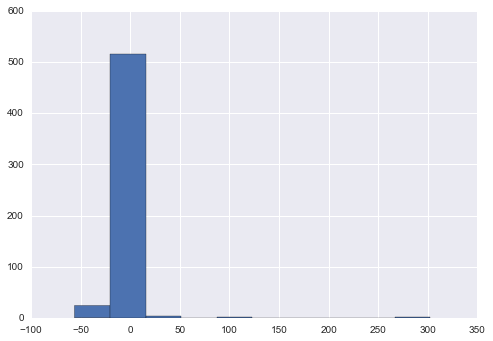

In [72]:
print 'absolute differences'
(intersect.diff(axis=1)['Mix1']).hist()

In [78]:
print 'correlation'
intersect.corr()

correlation


,0,Mix1
0,1.000000,0.999914
Mix1,0.999914,1.000000


0 is the reconstructed mixture from Cibersort's output; Mix1 is the actual input mixture.

We just sanity checked the weighted sum: absolute differences are small, and correlation is very high


# Simple mixtures

Make a fake mixture by adding:

1. 2 reference profiles
2. " with noise -- noise is either after the weighted sum or on the weights as applied to each gene
3. 2 raw lines from same publication
4. " with noise
5. 2 raw lines from another publication
4. " with noise

Randomly chose to do this with naive B cells and Tregs


### reference profiles, w/o noise and w/ two types of noise

In [39]:
simple_cols = ['B cells naive', 'T cells regulatory (Tregs)']
reference[simple_cols].shape

(547, 2)

In [40]:
!mkdir -p test_mixtures

In [82]:
weights = [.2, .6]
mix1=(reference[simple_cols] * weights).sum(axis=1)
mix1.head()

Gene symbol
ABCB4     115.842539
ABCB9      30.764903
ACAP1    1240.350751
ACHE       17.815217
ACP5      696.529088
dtype: float64

In [88]:
mix2 = mix1 + np.random.normal(0,1,len(mix1))
mix2.head()

Gene symbol
ABCB4     115.965707
ABCB9      31.866382
ACAP1    1240.885192
ACHE       16.847922
ACP5      694.951235
dtype: float64

In [95]:
weights_noisy = np.reshape([.2,.6]*len(mix1), (len(mix),2))
weights_noisy

array([[ 0.2,  0.6],
       [ 0.2,  0.6],
       [ 0.2,  0.6],
       ..., 
       [ 0.2,  0.6],
       [ 0.2,  0.6],
       [ 0.2,  0.6]])

In [96]:
weights_noisy += np.random.normal(0,0.1, weights_noisy.shape)
weights_noisy

array([[ 0.2930553 ,  0.66631899],
       [ 0.16110593,  0.57394888],
       [ 0.18299919,  0.54488804],
       ..., 
       [ 0.23374981,  0.60818033],
       [ 0.13073735,  0.45704406],
       [ 0.1508597 ,  0.7483734 ]])

In [98]:
weights_noisy = weights_noisy.clip(0,1)

In [99]:
weights_noisy

array([[ 0.2930553 ,  0.66631899],
       [ 0.16110593,  0.57394888],
       [ 0.18299919,  0.54488804],
       ..., 
       [ 0.23374981,  0.60818033],
       [ 0.13073735,  0.45704406],
       [ 0.1508597 ,  0.7483734 ]])

In [101]:
mix3=(weights_noisy * reference[simple_cols]).sum(axis=1)
mix3.head()

Gene symbol
ABCB4     168.074100
ABCB9      28.957747
ACAP1    1126.715428
ACHE       14.538402
ACP5      737.693181
dtype: float64

In [174]:
# write out the reference profile mixtures
ref_prof_mixtures = pd.DataFrame({'1 NoNoise':mix1, '2 SimpleNoise': mix2, '3 ComplexNoise': mix3})
ref_prof_mixtures.index.name='GeneSymbol'
ref_prof_mixtures.to_csv('test_mixtures/reference_profile_mixtures.txt', sep='\t')
print ref_prof_mixtures.shape
ref_prof_mixtures.head()

(547, 3)


,1 NoNoise,2 SimpleNoise,3 ComplexNoise
GeneSymbol,,,
ABCB4,115.842539,115.965707,168.074100
ABCB9,30.764903,31.866382,28.957747
ACAP1,1240.350751,1240.885192,1126.715428
ACHE,17.815217,16.847922,14.538402
ACP5,696.529088,694.951235,737.693181


In [184]:
!head test_mixtures/reference_profile_mixtures.txt

GeneSymbol	1 NoNoise	2 SimpleNoise	3 ComplexNoise
ABCB4	115.842538768	115.965706678	168.074100006
ABCB9	30.764902844	31.8663816384	28.9577474086
ACAP1	1240.35075084	1240.88519154	1126.71542757
ACHE	17.815217038	16.8479220951	14.5384018489
ACP5	696.52908772	694.951235251	737.69318093
ADAM28	433.608340806	433.545019368	375.126834547
ADAMDEC1	168.23131164	168.00879137	151.09777079
ADAMTS3	75.007484208	74.051901253	51.6753522346
ADRB2	227.50642538	228.914376607	331.774416842


#### run this through cibersort

In [175]:
!java -Xmx3g -Xms3g -jar ~/CIBERSORT_package/CIBERSORT.jar -M test_mixtures/reference_profile_mixtures.txt -B LM22.txt

>===================Settings====================
>Mixture file: test_mixtures/reference_profile_mixtures.txt
>Signature matrix file: LM22.txt
>===============================================
>R version 3.2.2 (2015-08-14)
>==================CIBERSORT====================
Column	B cells naive	B cells memory	Plasma cells	T cells CD8	T cells CD4 naive	T cells CD4 memory resting	T cells CD4 memory activated	T cells follicular helper	T cells regulatory (Tregs)	T cells gamma delta	NK cells resting	NK cells activated	Monocytes	Macrophages M0	Macrophages M1	Macrophages M2	Dendritic cells resting	Dendritic cells activated	Mast cells resting	Mast cells activated	Eosinophils	Neutrophils	P-value	Pearson Correlation	RMSE	
0	0.2475848522222436	0	0	1.1367771933502039E-5	0	0	0	0	0.75182807941639	7.409399524122566E-5	0	1.2562109006386982E-4	3.8602331225159246E-5	4.848524800312019E-5	1.526790584635879E-5	0	1.3391384575161947E-4	5.4183257726430725E-5	0	2.1436268602149545E-5	6.409664697303823E-5	0	0.0	0.999

In [176]:
results = """
Column	B cells naive	B cells memory	Plasma cells	T cells CD8	T cells CD4 naive	T cells CD4 memory resting	T cells CD4 memory activated	T cells follicular helper	T cells regulatory (Tregs)	T cells gamma delta	NK cells resting	NK cells activated	Monocytes	Macrophages M0	Macrophages M1	Macrophages M2	Dendritic cells resting	Dendritic cells activated	Mast cells resting	Mast cells activated	Eosinophils	Neutrophils	P-value	Pearson Correlation	RMSE	
0	0.2475848522222436	0	0	1.1367771933502039E-5	0	0	0	0	0.75182807941639	7.409399524122566E-5	0	1.2562109006386982E-4	3.8602331225159246E-5	4.848524800312019E-5	1.526790584635879E-5	0	1.3391384575161947E-4	5.4183257726430725E-5	0	2.1436268602149545E-5	6.409664697303823E-5	0	0.0	0.9995542199108519	0.27363944767312576
1	0.24745103645590372	0	0	4.2850071593568264E-5	0	0	0	0	0.7516137708959129	1.1287803393749142E-4	0	2.0825734747766846E-4	1.625802962341017E-4	1.3558744322905708E-4	2.175684046781182E-5	0	1.5040449473420684E-4	3.798968398114161E-5	3.104115206621788E-5	0	3.184728446216721E-5	0	0.0	0.9995543264275414	0.27382894259008417
2	0.2754518258842177	0	3.685119512156783E-4	0	0.020725806045789205	0.0037198281859717576	0.0049114205087473365	7.861161307236651E-4	0.6795657092050391	0.009223749196248802	0.0026950985287176525	0	0	0	0	7.632939004183949E-4	5.369998470000126E-4	7.105037264421552E-4	4.5270575105236686E-4	0	0	8.843113841615242E-5	0.0	0.9859003422306607	0.3281986809166312
"""
results = pd.read_csv(StringIO(results), sep='\t')
results.head()

,Column,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Pearson Correlation,RMSE,Unnamed: 26
0,0,0.247585,0,0.000000,0.000011,0.000000,0.00000,0.000000,0.000000,0.751828,...,0.000134,0.000054,0.000000,0.000021,0.000064,0.000000,0.0,0.999554,0.273639,NaN
1,1,0.247451,0,0.000000,0.000043,0.000000,0.00000,0.000000,0.000000,0.751614,...,0.000150,0.000038,0.000031,0.000000,0.000032,0.000000,0.0,0.999554,0.273829,NaN
2,2,0.275452,0,0.000369,0.000000,0.020726,0.00372,0.004911,0.000786,0.679566,...,0.000537,0.000711,0.000453,0.000000,0.000000,0.000088,0.0,0.985900,0.328199,NaN


In [177]:
del results['Unnamed: 26']
results_dat = results[results.columns[1:-3]]
print results.shape, results_dat.shape
results_dat.head()

(3, 26) (3, 22)


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,0.247585,0,0.000000,0.000011,0.000000,0.00000,0.000000,0.000000,0.751828,0.000074,...,0.000039,0.000048,0.000015,0.000000,0.000134,0.000054,0.000000,0.000021,0.000064,0.000000
1,0.247451,0,0.000000,0.000043,0.000000,0.00000,0.000000,0.000000,0.751614,0.000113,...,0.000163,0.000136,0.000022,0.000000,0.000150,0.000038,0.000031,0.000000,0.000032,0.000000
2,0.275452,0,0.000369,0.000000,0.020726,0.00372,0.004911,0.000786,0.679566,0.009224,...,0.000000,0.000000,0.000000,0.000763,0.000537,0.000711,0.000453,0.000000,0.000000,0.000088


In [178]:
ref_prof_weights = pd.DataFrame(np.zeros(results_dat.shape),columns=results_dat.columns)
ref_prof_weights.loc[:,simple_cols] = weights
ref_prof_weights

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
print 'correlation between GT and estimate per mixture'
print results_dat.corrwith(ref_prof_weights, axis=1)

correlation between GT and estimate per mixture
0    0.999993
1    0.999993
2    0.997515
dtype: float64


As expected, the deconvolution is off when we have complex noise in the mixture

absolute difference from ground truth, summarized by column:


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
count,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.056829,0.0,0.000123,0.000018,0.006909,0.001240,0.001637,0.000262,0.127669,0.003137,...,0.000067,0.000061,0.000012,0.000254,0.000274,0.000268,0.000161,0.000007,0.000032,0.000029
std,0.016128,0.0,0.000213,0.000022,0.011966,0.002148,0.002836,0.000454,0.041659,0.005271,...,0.000085,0.000069,0.000011,0.000441,0.000228,0.000384,0.000253,0.000012,0.000032,0.000051
min,0.047451,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079566,0.000074,...,0.000000,0.000000,0.000000,0.000000,0.000134,0.000038,0.000000,0.000000,0.000000,0.000000
25%,0.047518,0.0,0.000000,0.000006,0.000000,0.000000,0.000000,0.000000,0.115590,0.000093,...,0.000019,0.000024,0.000008,0.000000,0.000142,0.000046,0.000016,0.000000,0.000016,0.000000
50%,0.047585,0.0,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.151614,0.000113,...,0.000039,0.000048,0.000015,0.000000,0.000150,0.000054,0.000031,0.000000,0.000032,0.000000
75%,0.061518,0.0,0.000184,0.000027,0.010363,0.001860,0.002456,0.000393,0.151721,0.004668,...,0.000101,0.000092,0.000019,0.000382,0.000344,0.000382,0.000242,0.000011,0.000048,0.000044
max,0.075452,0.0,0.000369,0.000043,0.020726,0.003720,0.004911,0.000786,0.151828,0.009224,...,0.000163,0.000136,0.000022,0.000763,0.000537,0.000711,0.000453,0.000021,0.000064,0.000088


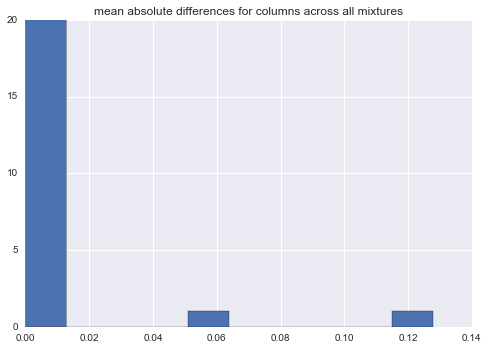

In [180]:
print 'absolute difference from ground truth, summarized by column:'
(results_dat - ref_prof_weights).describe().loc['mean'].hist()
plt.title('mean absolute differences for columns across all mixtures')
(results_dat - ref_prof_weights).describe()

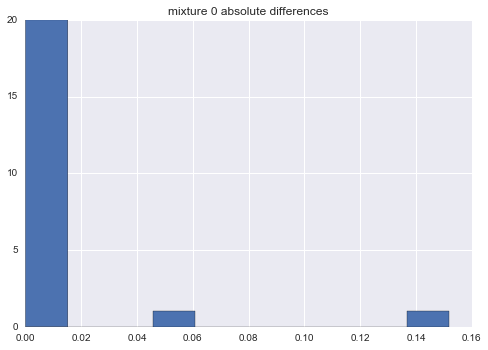

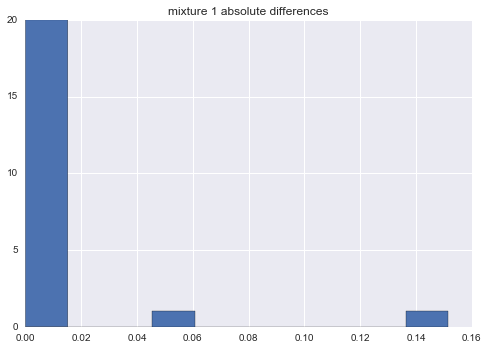

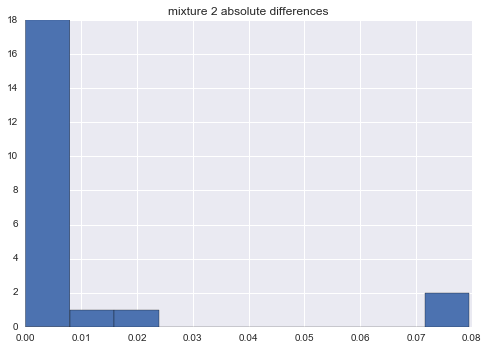

In [181]:
for _, row in (results_dat - ref_prof_weights).iterrows():
    plt.figure()
    row.hist()
    plt.title('mixture %d absolute differences' % row.name)

<strike>So noise definitely adds some confusion -- not much but nonzero. (Compare horizontal scales on these last plots)</strike>

Noise reduces confusion (absolute differences in fractions)! Look at horizontal scale.

But does noise make Cibersort doubt/change its fractions for the actual two cell types included, or does it make it think there might be other cell types involved?

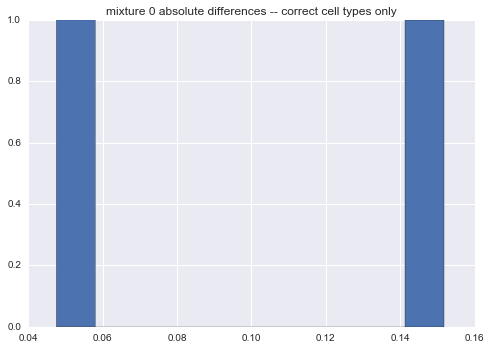

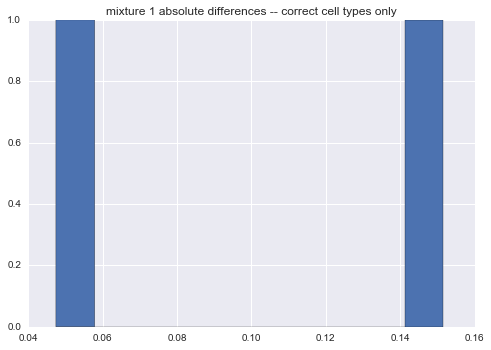

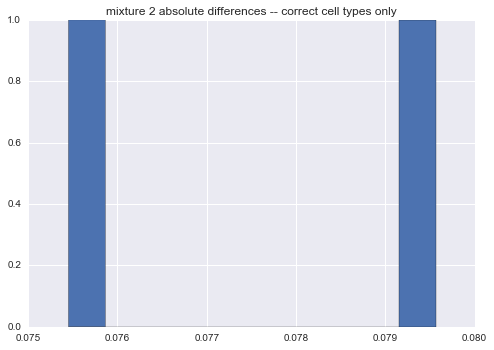

In [185]:
for _, row in (results_dat - ref_prof_weights).iterrows():
    plt.figure()
    row[simple_cols].hist()
    plt.title('mixture %d absolute differences -- correct cell types only' % row.name)

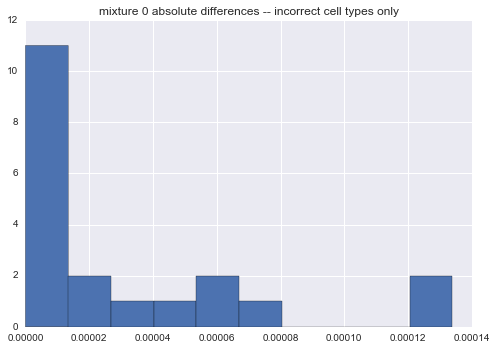

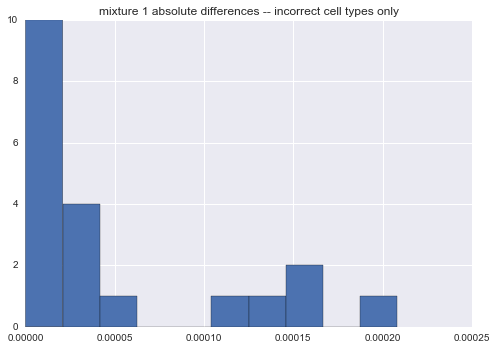

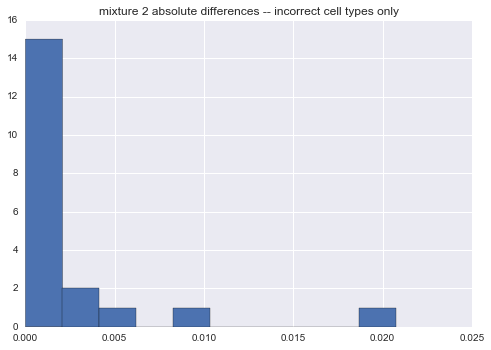

In [186]:
other_cols = set(results_dat.columns) - set(simple_cols)
for _, row in (results_dat - ref_prof_weights).iterrows():
    plt.figure()
    row[other_cols].hist()
    plt.title('mixture %d absolute differences -- incorrect cell types only' % row.name)

Interesting!

* Noise (complex) halves the difference in fractions for the actual cell types there. This part of the deconvolution is better with noise! (Unexpected.)
* Noise makes Cibersort less certain that other cell types are not there -- we see more difference from 0 by two orders of magnitude. (Compare the horizontal scales on the last plots). This is expected

What are the P values of Cibersort w/ and w/o noise? Always 0:

In [187]:
results['P-value']

0    0.0
1    0.0
2    0.0
Name: P-value, dtype: float64

## 2 raw lines from same publication (Cib)

In [188]:
cib_raw = pd.read_csv('curated_data/pure_samples/cibersort/LM22-ref-sample.txt', sep='\t')
cib_raw.head()

,Relabel,A_LW_+BAFF_U133A_250303 [Chtanova_immune|A_LW_+BAFF_U133A_250303],A_LW_+BAFF_U133A_70303 [Chtanova_immune|A_LW_+BAFF_U133A_70303],A_LW_-BAFF_U133A_250303 [Chtanova_immune|A_LW_-BAFF_U133A_250303],A_LW_-BAFF_U133A_70303 [Chtanova_immune|A_LW_-BAFF_U133A_70303],A_LW_CD57+_U133A_030603 [Chtanova_immune|A_LW_CD57+_U133A_030603],A_LW_CD57+_U133A_121102 [Chtanova_immune|A_LW_CD57+_U133A_121102],A_LW_CD57-_U133A_030603 [Chtanova_immune|A_LW_CD57-_U133A_030603],A_LW_CD57-_U133A_121102 [Chtanova_immune|A_LW_CD57-_U133A_121102],A_LW_DC+BAFF_U133A_250304 [Chtanova_immune|A_LW_DC+BAFF_U133A_250304],...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1],TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2],TN_U133A_3 [TFH_E-MEXP-750|TN_U133A_3],TH_1 [TREGs_GSE4527|GSM101518],Treg_1 [TREGs_GSE4527|GSM101519],TH_2 [TREGs_GSE4527|GSM101520],Treg_2 [TREGs_GSE4527|GSM101521]
0,A1CF,123.126291,200.096593,98.131873,101.011423,127.567885,109.295918,48.352882,328.453377,370.158338,...,27.752002,81.227451,25.180355,285.075510,172.215727,201.051021,736.149237,400.456332,187.566155,414.069368
1,A2M,6.717625,20.118036,66.069727,92.850207,56.525064,11.575293,73.481899,31.083799,8579.063240,...,10.950348,6.779301,85.101667,18.227925,16.924983,9.039432,129.643861,75.252245,28.603811,22.338213
2,A4GALT,99.776993,56.050865,52.735724,62.908979,115.173360,86.849782,67.478214,172.369277,112.346538,...,22.164461,41.200690,24.504919,145.190417,135.992279,62.335556,232.214201,335.890507,207.934712,56.080230
3,A4GNT,155.687079,277.949173,186.486014,147.002254,165.954151,102.583059,95.945725,231.328049,151.153031,...,127.732540,100.458390,341.302205,411.623288,216.770728,141.512782,384.736274,510.736942,203.089268,539.912283
4,AAAS,11.966722,20.671809,25.856604,9.910548,126.638097,24.107794,159.323152,35.289550,20.363367,...,216.557256,108.114573,126.690956,423.425075,162.619165,151.616733,96.051241,176.780559,248.657488,89.153691


In [189]:
# copied from Variance....ipynb
cols_4 = pd.read_csv('curated_data/pure_samples/cibersort/LM22-classes.txt', sep='\t', header=None)
cols_4_orig = pd.read_csv('curated_data/pure_samples/cibersort/LM22-ref-sample.txt', sep='\t').columns
print cols_4_orig
cols_4.head()

Index([u'Relabel',
       u'A_LW_+BAFF_U133A_250303 [Chtanova_immune|A_LW_+BAFF_U133A_250303]',
       u'A_LW_+BAFF_U133A_70303 [Chtanova_immune|A_LW_+BAFF_U133A_70303]',
       u'A_LW_-BAFF_U133A_250303 [Chtanova_immune|A_LW_-BAFF_U133A_250303]',
       u'A_LW_-BAFF_U133A_70303 [Chtanova_immune|A_LW_-BAFF_U133A_70303]',
       u'A_LW_CD57+_U133A_030603 [Chtanova_immune|A_LW_CD57+_U133A_030603]',
       u'A_LW_CD57+_U133A_121102 [Chtanova_immune|A_LW_CD57+_U133A_121102]',
       u'A_LW_CD57-_U133A_030603 [Chtanova_immune|A_LW_CD57-_U133A_030603]',
       u'A_LW_CD57-_U133A_121102 [Chtanova_immune|A_LW_CD57-_U133A_121102]',
       u'A_LW_DC+BAFF_U133A_250304 [Chtanova_immune|A_LW_DC+BAFF_U133A_250304]',
       ...
       u'TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1]',
       u'TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2]',
       u'TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3]',
       u'TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1]',
       u'TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2]',
       u'TN_U133A_3 [

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,B cells naive,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
1,B cells memory,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
2,Plasma cells,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
3,T cells CD8,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,2,0,2
4,T cells CD4 naive,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,2,0,2


In [190]:
column_mappings = {}
for _,row in cols_4.iterrows():
    # print row[row==1].index
    print row[0]
    #print cols_4_orig[row[row==1].index]
    for ix, s in enumerate(cols_4_orig[row[row==1].index]):
        column_mappings[s] = row[0] + "_%d" % (ix+1)
    #break

B cells naive
B cells memory
Plasma cells
T cells CD8
T cells CD4 naive
T cells CD4 memory resting
T cells CD4 memory activated
T cells follicular helper
T cells gamma delta
T cells regulatory (Tregs)
NK cells resting
NK cells activated
Monocytes
Macrophages M0
Macrophages M1
Macrophages M2
Dendritic cells resting
Dendritic cells activated
Mast cells resting
Mast cells activated
Eosinophils
Neutrophils


In [191]:
column_mappings

{'A_LW_mastcellIgE_U133A [Chtanova_immune|A_LW_mastcellIgE_U133A]': 'Mast cells activated_1',
 'A_LW_mastcellctrl_U133A [Chtanova_immune|A_LW_mastcellctrl_U133A]': 'Mast cells resting_1',
 'A_LW_neutrophil_U133A [Chtanova_immune|A_LW_neutrophil_U133A]': 'Neutrophils_1',
 'A_MF_2hrEosinophils_U133A [Chtanova_immune|A_MF_2hrEosinophils_U133A]': 'Eosinophils_1',
 'A_MF_ControlEosinophil [Chtanova_immune|A_MF_ControlEosinophil]': 'Eosinophils_2',
 'A_MF_ControlMASTCELL_U133A [Chtanova_immune|A_MF_ControlMASTCELL_U133A]': 'Mast cells resting_2',
 'A_MF_IgEMASTCELL_U133A [Chtanova_immune|A_MF_IgEMASTCELL_U133A]': 'Mast cells activated_2',
 'A_MF_neutrophils_U133A [Chtanova_immune|A_MF_neutrophils_U133A]': 'Neutrophils_2',
 'A_TS_MSNeutroLPS_U133A [Chtanova_immune|A_TS_MSNeutroLPS_U133A]': 'Neutrophils_3',
 'A_TS_RN_gdTcellsREP_A [Chtanova_immune|A_TS_RN_gdTcellsREP_A]': 'T cells gamma delta_2',
 'A_TS_RN_gdTcells_U133A [Chtanova_immune|A_TS_RN_gdTcells_U133A]': 'T cells gamma delta_1',
 'Alt

In [192]:
cib_raw = cib_raw.rename(columns=lambda x: column_mappings[x] if x in column_mappings else x)
cib_raw.head()

,Relabel,A_LW_+BAFF_U133A_250303 [Chtanova_immune|A_LW_+BAFF_U133A_250303],A_LW_+BAFF_U133A_70303 [Chtanova_immune|A_LW_+BAFF_U133A_70303],A_LW_-BAFF_U133A_250303 [Chtanova_immune|A_LW_-BAFF_U133A_250303],A_LW_-BAFF_U133A_70303 [Chtanova_immune|A_LW_-BAFF_U133A_70303],A_LW_CD57+_U133A_030603 [Chtanova_immune|A_LW_CD57+_U133A_030603],A_LW_CD57+_U133A_121102 [Chtanova_immune|A_LW_CD57+_U133A_121102],A_LW_CD57-_U133A_030603 [Chtanova_immune|A_LW_CD57-_U133A_030603],A_LW_CD57-_U133A_121102 [Chtanova_immune|A_LW_CD57-_U133A_121102],A_LW_DC+BAFF_U133A_250304 [Chtanova_immune|A_LW_DC+BAFF_U133A_250304],...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],T cells CD4 naive_1,T cells CD4 naive_2,T cells CD4 naive_3,TH_1 [TREGs_GSE4527|GSM101518],T cells regulatory (Tregs)_1,TH_2 [TREGs_GSE4527|GSM101520],T cells regulatory (Tregs)_2
0,A1CF,123.126291,200.096593,98.131873,101.011423,127.567885,109.295918,48.352882,328.453377,370.158338,...,27.752002,81.227451,25.180355,285.075510,172.215727,201.051021,736.149237,400.456332,187.566155,414.069368
1,A2M,6.717625,20.118036,66.069727,92.850207,56.525064,11.575293,73.481899,31.083799,8579.063240,...,10.950348,6.779301,85.101667,18.227925,16.924983,9.039432,129.643861,75.252245,28.603811,22.338213
2,A4GALT,99.776993,56.050865,52.735724,62.908979,115.173360,86.849782,67.478214,172.369277,112.346538,...,22.164461,41.200690,24.504919,145.190417,135.992279,62.335556,232.214201,335.890507,207.934712,56.080230
3,A4GNT,155.687079,277.949173,186.486014,147.002254,165.954151,102.583059,95.945725,231.328049,151.153031,...,127.732540,100.458390,341.302205,411.623288,216.770728,141.512782,384.736274,510.736942,203.089268,539.912283
4,AAAS,11.966722,20.671809,25.856604,9.910548,126.638097,24.107794,159.323152,35.289550,20.363367,...,216.557256,108.114573,126.690956,423.425075,162.619165,151.616733,96.051241,176.780559,248.657488,89.153691


In [193]:
cib_raw = cib_raw.set_index('Relabel')
cib_raw.head()

,A_LW_+BAFF_U133A_250303 [Chtanova_immune|A_LW_+BAFF_U133A_250303],A_LW_+BAFF_U133A_70303 [Chtanova_immune|A_LW_+BAFF_U133A_70303],A_LW_-BAFF_U133A_250303 [Chtanova_immune|A_LW_-BAFF_U133A_250303],A_LW_-BAFF_U133A_70303 [Chtanova_immune|A_LW_-BAFF_U133A_70303],A_LW_CD57+_U133A_030603 [Chtanova_immune|A_LW_CD57+_U133A_030603],A_LW_CD57+_U133A_121102 [Chtanova_immune|A_LW_CD57+_U133A_121102],A_LW_CD57-_U133A_030603 [Chtanova_immune|A_LW_CD57-_U133A_030603],A_LW_CD57-_U133A_121102 [Chtanova_immune|A_LW_CD57-_U133A_121102],A_LW_DC+BAFF_U133A_250304 [Chtanova_immune|A_LW_DC+BAFF_U133A_250304],A_LW_DC-BAFF_U133A_250304 [Chtanova_immune|A_LW_DC-BAFF_U133A_250304],...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],T cells CD4 naive_1,T cells CD4 naive_2,T cells CD4 naive_3,TH_1 [TREGs_GSE4527|GSM101518],T cells regulatory (Tregs)_1,TH_2 [TREGs_GSE4527|GSM101520],T cells regulatory (Tregs)_2
Relabel,,,,,,,,,,,,,,,,,,,,,
A1CF,123.126291,200.096593,98.131873,101.011423,127.567885,109.295918,48.352882,328.453377,370.158338,313.799840,...,27.752002,81.227451,25.180355,285.075510,172.215727,201.051021,736.149237,400.456332,187.566155,414.069368
A2M,6.717625,20.118036,66.069727,92.850207,56.525064,11.575293,73.481899,31.083799,8579.063240,10105.476910,...,10.950348,6.779301,85.101667,18.227925,16.924983,9.039432,129.643861,75.252245,28.603811,22.338213
A4GALT,99.776993,56.050865,52.735724,62.908979,115.173360,86.849782,67.478214,172.369277,112.346538,37.343273,...,22.164461,41.200690,24.504919,145.190417,135.992279,62.335556,232.214201,335.890507,207.934712,56.080230
A4GNT,155.687079,277.949173,186.486014,147.002254,165.954151,102.583059,95.945725,231.328049,151.153031,87.579816,...,127.732540,100.458390,341.302205,411.623288,216.770728,141.512782,384.736274,510.736942,203.089268,539.912283
AAAS,11.966722,20.671809,25.856604,9.910548,126.638097,24.107794,159.323152,35.289550,20.363367,45.995957,...,216.557256,108.114573,126.690956,423.425075,162.619165,151.616733,96.051241,176.780559,248.657488,89.153691


In [194]:
for c in cib_raw.columns:
    if 'b cells naive' in c.lower():
        print c
    if 'reg' in c.lower():
        print c

B cells naive_1
B cells naive_2
B cells naive_3
B cells naive_4
B cells naive_5
B cells naive_6
B cells naive_7
TH_1 [TREGs_GSE4527|GSM101518]
T cells regulatory (Tregs)_1
TH_2 [TREGs_GSE4527|GSM101520]
T cells regulatory (Tregs)_2


In [195]:
raw_cols = ['B cells naive_3', 'T cells regulatory (Tregs)_2']
weights, simple_cols, raw_cols

([0.2, 0.6],
 ['B cells naive', 'T cells regulatory (Tregs)'],
 ['B cells naive_3', 'T cells regulatory (Tregs)_2'])

In [196]:
mix4=(cib_raw[raw_cols] * weights).sum(axis=1)
print mix4.shape
mix4.head()

(11866,)


Relabel
A1CF      394.948380
A2M        18.191373
A4GALT     46.246087
A4GNT     427.568741
AAAS       62.422033
dtype: float64

In [197]:
mix5 = mix4 + np.random.normal(0,1,len(mix4))
print mix5.shape
mix5.head()

(11866,)


Relabel
A1CF      396.847355
A2M        18.590131
A4GALT     44.555215
A4GNT     427.096902
AAAS       63.492888
dtype: float64

In [198]:
weights_noisy2 = np.reshape(weights*len(mix4), cib_raw[raw_cols].shape)
weights_noisy2 += np.random.normal(0,0.1, weights_noisy2.shape)
mix6=(weights_noisy2 * cib_raw[raw_cols]).sum(axis=1)
print mix6.shape
mix6.head()

(11866,)


Relabel
A1CF      335.622569
A2M        17.389372
A4GALT     44.831886
A4GNT     400.569798
AAAS       76.709204
dtype: float64

In [200]:
raw_line_mixtures = pd.DataFrame({'4 NoNoise':mix4, '5 SimpleNoise': mix5, '6 ComplexNoise': mix6})
raw_line_mixtures.index.name='GeneSymbol'
raw_line_mixtures.to_csv('test_mixtures/raw_line_mixtures.txt', sep='\t')
raw_line_mixtures.head()

,4 NoNoise,5 SimpleNoise,6 ComplexNoise
GeneSymbol,,,
A1CF,394.948380,396.847355,335.622569
A2M,18.191373,18.590131,17.389372
A4GALT,46.246087,44.555215,44.831886
A4GNT,427.568741,427.096902,400.569798
AAAS,62.422033,63.492888,76.709204


In [201]:
raw_line_mixtures.shape

(11866, 3)

### run cibersort on this

In [202]:
!java -Xmx3g -Xms3g -jar ~/CIBERSORT_package/CIBERSORT.jar -M test_mixtures/raw_line_mixtures.txt -B LM22.txt

>===================Settings====================
>Mixture file: test_mixtures/raw_line_mixtures.txt
>Signature matrix file: LM22.txt
>===============================================
>R version 3.2.2 (2015-08-14)
>==================CIBERSORT====================
Column	B cells naive	B cells memory	Plasma cells	T cells CD8	T cells CD4 naive	T cells CD4 memory resting	T cells CD4 memory activated	T cells follicular helper	T cells regulatory (Tregs)	T cells gamma delta	NK cells resting	NK cells activated	Monocytes	Macrophages M0	Macrophages M1	Macrophages M2	Dendritic cells resting	Dendritic cells activated	Mast cells resting	Mast cells activated	Eosinophils	Neutrophils	P-value	Pearson Correlation	RMSE	
0	0.14982057100503043	0.015948300720959083	0	0.006323083441197599	0	0.012651010022335832	6.717509469405661E-4	0.043212055776694125	0.7425223815404285	0	0	0.007180611409851871	0.002846844472348345	0.0020898774475384798	0.002802667788196814	0	0.006102280684462129	0	0.006369969028170998	4.97046

In [204]:
results2 = """
Column	B cells naive	B cells memory	Plasma cells	T cells CD8	T cells CD4 naive	T cells CD4 memory resting	T cells CD4 memory activated	T cells follicular helper	T cells regulatory (Tregs)	T cells gamma delta	NK cells resting	NK cells activated	Monocytes	Macrophages M0	Macrophages M1	Macrophages M2	Dendritic cells resting	Dendritic cells activated	Mast cells resting	Mast cells activated	Eosinophils	Neutrophils	P-value	Pearson Correlation	RMSE	
0	0.14982057100503043	0.015948300720959083	0	0.006323083441197599	0	0.012651010022335832	6.717509469405661E-4	0.043212055776694125	0.7425223815404285	0	0	0.007180611409851871	0.002846844472348345	0.0020898774475384798	0.002802667788196814	0	0.006102280684462129	0	0.006369969028170998	4.9704622928917E-4	0	9.61549486556013E-4	0.0	0.9296312058888242	0.42179656619478945
1	0.1493908206681424	0.01623846019718687	0	0.0062098851788905665	0	0.012824000573624898	5.063049538920099E-4	0.04286498773182025	0.7423834390965147	0	0	0.00796690533750149	0.00279224186808749	0.0021413983317062667	0.002794662315321037	0	0.00578111671417886	0	0.007137722624923614	0	0	9.680544082095135E-4	0.0	0.9296118552509411	0.42191113651613743
2	0.042321938138843475	0.1270486848488944	0	0	0.0019047715386165099	0	0	0.020672166542694315	0.7703156973279989	0.0021190037566370533	0	0.006895334401593652	0.0022439261047836655	0.0048461795791647725	0.0019641515086535684	0	0.010672222543579059	0	0	0.008995923708540639	0	0	0.0	0.9150525885711576	0.44694887066985195
"""
results2 = pd.read_csv(StringIO(results2), sep='\t')
results2.head()

,Column,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Pearson Correlation,RMSE,Unnamed: 26
0,0,0.149821,0.015948,0,0.006323,0.000000,0.012651,0.000672,0.043212,0.742522,...,0.006102,0,0.006370,0.000497,0,0.000962,0.0,0.929631,0.421797,NaN
1,1,0.149391,0.016238,0,0.006210,0.000000,0.012824,0.000506,0.042865,0.742383,...,0.005781,0,0.007138,0.000000,0,0.000968,0.0,0.929612,0.421911,NaN
2,2,0.042322,0.127049,0,0.000000,0.001905,0.000000,0.000000,0.020672,0.770316,...,0.010672,0,0.000000,0.008996,0,0.000000,0.0,0.915053,0.446949,NaN


In [205]:
del results2['Unnamed: 26']
results2_dat = results2[results2.columns[1:-3]]
print results2.shape, results2_dat.shape
results2_dat.head()

(3, 26) (3, 22)


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,0.149821,0.015948,0,0.006323,0.000000,0.012651,0.000672,0.043212,0.742522,0.000000,...,0.002847,0.002090,0.002803,0,0.006102,0,0.006370,0.000497,0,0.000962
1,0.149391,0.016238,0,0.006210,0.000000,0.012824,0.000506,0.042865,0.742383,0.000000,...,0.002792,0.002141,0.002795,0,0.005781,0,0.007138,0.000000,0,0.000968
2,0.042322,0.127049,0,0.000000,0.001905,0.000000,0.000000,0.020672,0.770316,0.002119,...,0.002244,0.004846,0.001964,0,0.010672,0,0.000000,0.008996,0,0.000000


In [211]:
raw_line_weights = pd.DataFrame(np.zeros(results2_dat.shape),columns=results2_dat.columns)
raw_line_weights.loc[:,simple_cols] = weights
raw_line_weights


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
print 'correlation between GT and estimate per mixture'
print results2_dat.corrwith(raw_line_weights, axis=1)


correlation between GT and estimate per mixture
0    0.989638
1    0.989568
2    0.947366
dtype: float64


As expected:

* worse correlation in general than when using reference profiles. not that big a difference though
* complex noise --> significantly lower correlation

absolute difference from ground truth, summarized by column:


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
count,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.0,3.000000
mean,-0.086156,0.053078,0.0,0.004178,0.000635,0.008492,0.000393,0.035583,0.151741,0.000706,...,0.002628,0.003026,0.002520,0.0,0.007519,0.0,0.004503,0.003164,0.0,0.000643
std,0.061941,0.064060,0.0,0.003618,0.001100,0.007355,0.000350,0.012914,0.016087,0.001223,...,0.000333,0.001577,0.000482,0.0,0.002736,0.0,0.003918,0.005056,0.0,0.000557
min,-0.157678,0.015948,0.0,0.000000,0.000000,0.000000,0.000000,0.020672,0.142383,0.000000,...,0.002244,0.002090,0.001964,0.0,0.005781,0.0,0.000000,0.000000,0.0,0.000000
25%,-0.104144,0.016093,0.0,0.003105,0.000000,0.006326,0.000253,0.031769,0.142453,0.000000,...,0.002518,0.002116,0.002379,0.0,0.005942,0.0,0.003185,0.000249,0.0,0.000481
50%,-0.050609,0.016238,0.0,0.006210,0.000000,0.012651,0.000506,0.042865,0.142522,0.000000,...,0.002792,0.002141,0.002795,0.0,0.006102,0.0,0.006370,0.000497,0.0,0.000962
75%,-0.050394,0.071644,0.0,0.006266,0.000952,0.012738,0.000589,0.043039,0.156419,0.001060,...,0.002820,0.003494,0.002799,0.0,0.008387,0.0,0.006754,0.004746,0.0,0.000965
max,-0.050179,0.127049,0.0,0.006323,0.001905,0.012824,0.000672,0.043212,0.170316,0.002119,...,0.002847,0.004846,0.002803,0.0,0.010672,0.0,0.007138,0.008996,0.0,0.000968


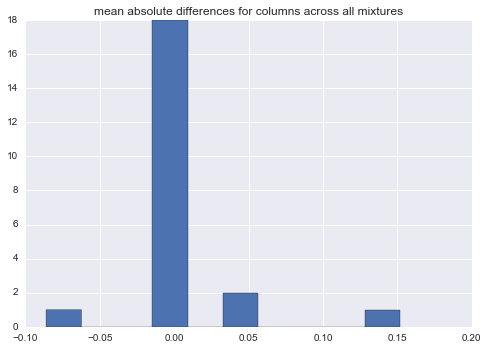

In [208]:
print 'absolute difference from ground truth, summarized by column:'
(results2_dat - raw_line_weights).describe().loc['mean'].hist()
plt.title('mean absolute differences for columns across all mixtures')
(results2_dat - raw_line_weights).describe()


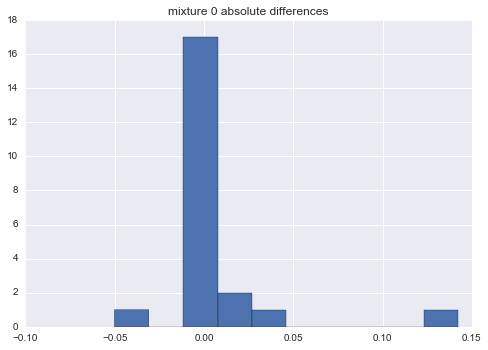

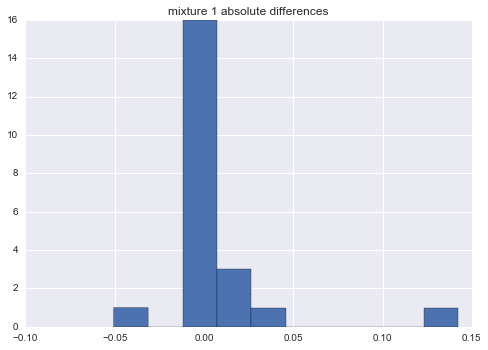

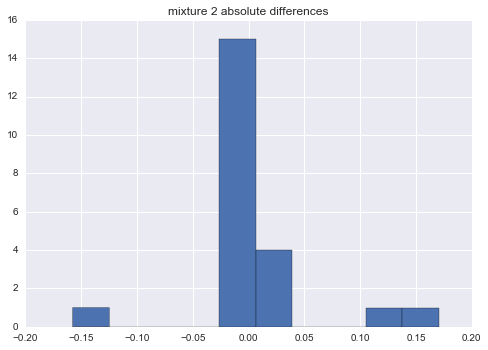

In [209]:
for _, row in (results2_dat - raw_line_weights).iterrows():
    plt.figure()
    row.hist()
    plt.title('mixture %d absolute differences' % row.name)


The errors per column look about the same magnitudes regardless of noise status. Some columns worse than others consistently.

Let's see error/column by whether the column is from correct or incorrect cell type:


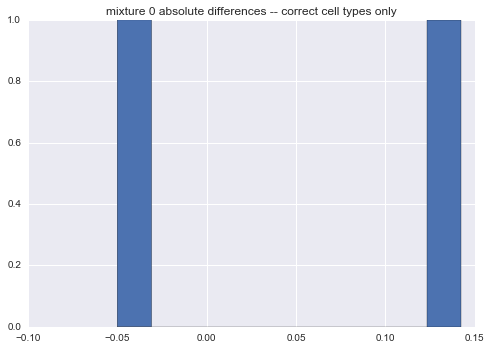

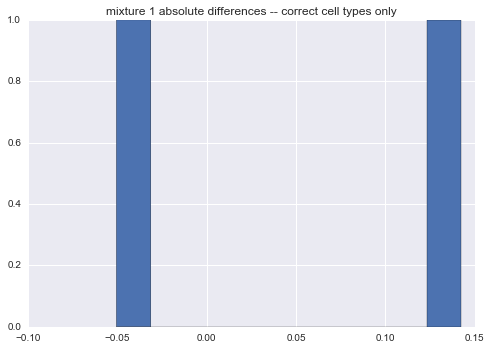

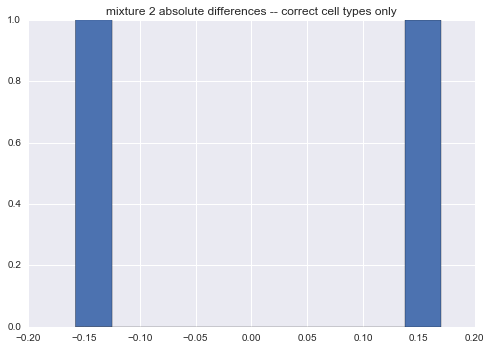

In [212]:
for _, row in (results2_dat - raw_line_weights).iterrows():
    plt.figure()
    row[simple_cols].hist()
    plt.title('mixture %d absolute differences -- correct cell types only' % row.name)


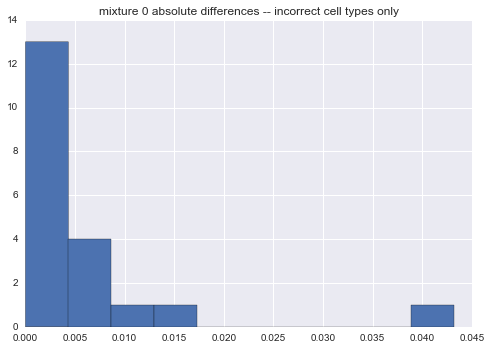

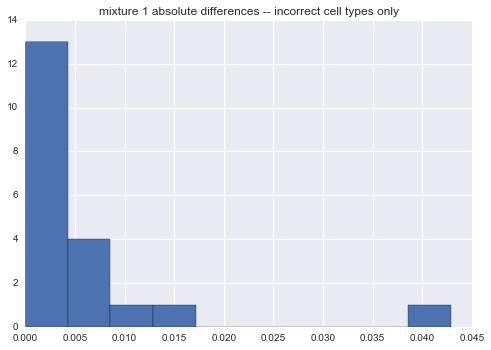

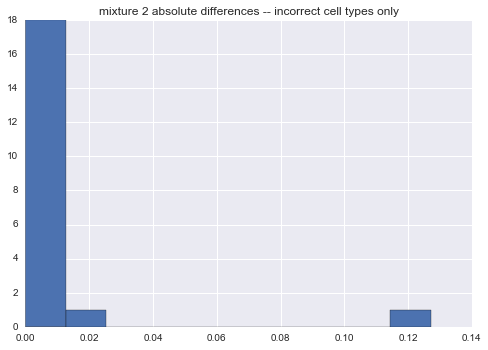

In [213]:
other_cols = set(results2_dat.columns) - set(simple_cols)
for _, row in (results2_dat - raw_line_weights).iterrows():
    plt.figure()
    row[other_cols].hist()
    plt.title('mixture %d absolute differences -- incorrect cell types only' % row.name)


In [215]:
(results2_dat - raw_line_weights)[simple_cols]

,B cells naive,T cells regulatory (Tregs)
0,-0.050179,0.142522
1,-0.050609,0.142383
2,-0.157678,0.170316


Correct columns (with true fractions `[.2,.6]`): 

Correct columns: one is significantly off always. Other one is more off when complex noise added.

Which one is significantly off always: Treg.
This is likely because there are many similar cell types.

Incorrect columns (with true fraction `= 0`): error (difference from 0) increases a lot with noise. Meaning: complex noise makes Cibersort less certain that other cell types are not there.

And P-values are all still 0:

In [214]:
results2['P-value']

0    0.0
1    0.0
2    0.0
Name: P-value, dtype: float64